1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

-0.9995999999999999
-0.9995999999999999
Solution for x0 = [0, -0.7] : f([ 0.08984201 -0.71265641]) = -1.03163
Solution for x1 = [0, 0.7]: f([-0.08984202  0.71265639]) = -1.03163
Solution for x2 = [0, 0]: f([0. 0.]) = 0.00000


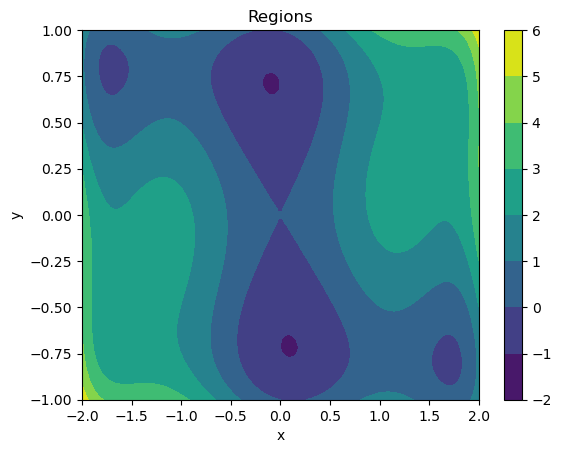

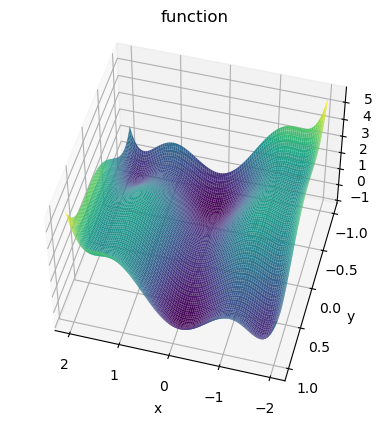

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from pylab import *

## 1. 
def f(U):
    return ((4-2.1*U[0]**2 + U[0]**4/3)*U[0]**2 + U[0]*U[1] + (4*U[1]**2-4)*U[1]**2)

x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 1, 100)

X, Y = np.meshgrid(x, y)
Z = f([X,Y])
plt.figure()
plt.contourf(x, y, Z)
plt.title('Regions')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
# We can see over this meshgrid 2 minima around x = 0 and y = -0.75 and y = 0.75

#lower = np.random.uniform(-2, 2, 100)
#upper = np.linspace(-1, 1, 100)
#initial_guess = (0, 0)
#res = optimize.minimize(f, initial_guess)
#solution = optimize.minimize(f,initial_guess)#, args=(5,), bracket=(l, u)) for (l, u) in zip(lower, upper)]
#plt.plot(x, f([x,y]))
#plt.axvline(solution['x'], color='r')

#plt.axvline(solution['x'], color='r')

#plot the function in 3D
plt.figure()
ax = plt.axes(projection='3d')
#we change the point of view to better sew the minimums
ax.view_init(50, 105)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                       cmap='viridis', edgecolor='none')
ax.set_title('function');

#We find the two global minimabsa : [0, -0.7] and [0, 0.7]
print(f([0, -0.7]))
print(f([0, 0.7]))

## 2. 
#They have the same values so it is like one global minimum
#However, the two global minimum => local minimum
#We got the two minimum values of the function at the same value -0.9996.
#To find the two global minimum, we need to search with two different first values 
#These two "global" minimum are the local minimum of the function

# Initial guess:
x0 = [0, -0.7]

res = optimize.minimize(f, x0)
solution = res['x']
evaluation = f(solution)

print('Solution for x0 = [0, -0.7] : f(%s) = %.5f' % (solution, evaluation))


# Initial guess:
x1 = [0, 0.7]
res = optimize.minimize(f, x1)
solution1 = res['x']
evaluation1 = f(solution1)
print('Solution for x1 = [0, 0.7]: f(%s) = %.5f' % (solution1, evaluation1))

# We clearly have the same function value of those global minima, which is -1.03163.


## 3. Initial guess at (0,0)
x2 = [0, 0]
res = optimize.minimize(f, x2)
solution2 = res['x']
evaluation2 = f(solution2)
print('Solution for x2 = [0, 0]: f(%s) = %.5f' % (solution2, evaluation2))
# We obtain for (0,0) the function value equal to 0

2\. **Non-linear ODE: the damped pendulum**

The equation of the motion that a pendulum makes with respect to the angle $\theta$ with the vertical is given by:

$$\frac{d^2\theta}{dt^2} = -\frac{1}{Q} \frac{d\theta}{dt} + \sin\theta + d \cos\Omega t$$

where $t$ is time, $Q$ is the damping factor, $d$ is the forcing amplitude, and $\Omega$ is the driving frequency of the forcing. 

This second order ODE needs to be written as two coupled first order ODEs defining a new variable $\omega \equiv d\theta/dt$:

$$\frac{d\theta}{dt} = \omega$$
$$\frac{d\omega}{dt} = -\frac{1}{Q}\,\omega + \sin\theta + d \cos\Omega t$$

Consider the initial conditions $\theta_0 = \omega_0 = 0$, and $Q = 2.0$, $d = 1.5$, and $\omega = 0.65$.

 - Solve the ODE with `odeint` over a pariod of 200 time steps
 - Create two plots, one of $\theta$ as a function of the time, and $\omega$ as a function of the time
 - **Optional**: determine if there is a set of parameters for which the motion is chaotic.

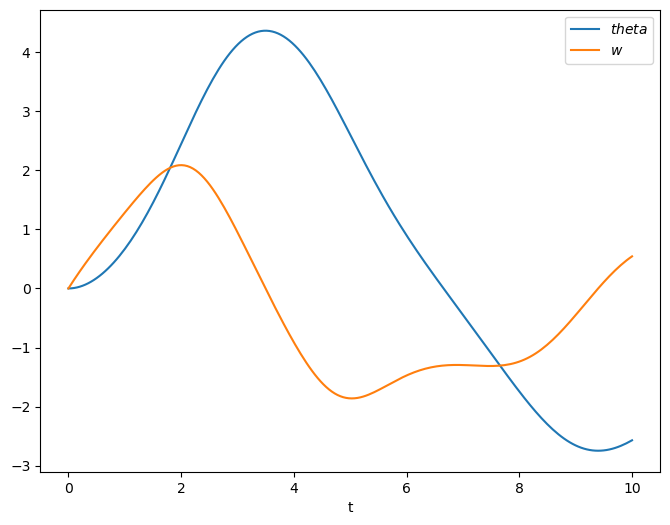

In [13]:
from scipy.integrate import odeint
from math import sin, cos

# X = (theta, w)
def double_deriv(X,time,Q,d,omega):
    return (X[1], -(1/Q)*X[1] + sin(X[0]) +d*cos(omega*time))

Xinit = (0,0)
time = np.linspace(0, 10, 200)
Q = 2
d = 1.5
omega = 0.65
X = odeint(double_deriv, y0 = Xinit, t= time, args=(Q,d,omega))

plt.figure(figsize=(8, 6))
plt.plot(t, X[:, 0], label="$theta$") 
plt.plot(t, X[:, 1], label="$w$")
plt.xlabel('t')
plt.legend(loc='best')

3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

The dataset is the one dowloaded at the beginning of Lecture 06:

 - `!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/`

In [14]:
!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/

--2022-12-16 11:11:59--  https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/ebe1cnyd2gm836a/populations.txt [following]
--2022-12-16 11:11:59--  https://www.dropbox.com/s/raw/ebe1cnyd2gm836a/populations.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd2332dbe3b259a910872d0b0fa.dl.dropboxusercontent.com/cd/0/inline/ByvhsueNSE6pIJjCV4dcG4wc1kBy6GXtaw0MP7txV3MK9SieNsTAY_xtkidnmdAORt3XmfKDqd3Uvd1m1NhFc0Dx3EXvhs-GXlVyGvuuhb_khc7qdj1xI8WR_jZhmBlLLqeOrS1Oo1NsAvJFO1WKesH4u8jJCyA8URZGN_yiBTbJqg/file# [following]
--2022-12-16 11:12:00--  https://ucd2332dbe3b259a910872d0b0fa.dl.dropboxusercontent.com/cd/0/inline/ByvhsueNSE6pIJjCV4dcG4wc1kBy6GXtaw0MP7txV3MK9SieNsTAY_xtkidnmdAORt3XmfKDqd3Uvd1m1NhFc0Dx3EXvhs-GX

# year	hare	lynx	carrot
1900	30e3	4e3	48300
1901	47.2e3	6.1e3	48200
1902	70.2e3	9.8e3	41500
1903	77.4e3	35.2e3	38200
1904	36.3e3	59.4e3	40600
1905	20.6e3	41.7e3	39800
1906	18.1e3	19e3	38600
1907	21.4e3	13e3	42300
1908	22e3	8.3e3	44500
1909	25.4e3	9.1e3	42100
1910	27.1e3	7.4e3	46000
1911	40.3e3	8e3	46800
1912	57e3	12.3e3	43800
1913	76.6e3	19.5e3	40900
1914	52.3e3	45.7e3	39400
1915	19.5e3	51.1e3	39000
1916	11.2e3	29.7e3	36700
1917	7.6e3	15.8e3	41800
1918	14.6e3	9.7e3	43300
1919	16.2e3	10.1e3	41300
1920	24.7e3	8.6e3	47300
[         inf  21.          10.5          7.           5.25
   4.2          3.5          3.           2.625        2.33333333
   2.1         -2.1         -2.33333333  -2.625       -3.
  -3.5         -4.2         -5.25        -7.         -10.5
 -21.        ]


/var/folders/dv/ctwb40g55qxf959xsh2gxtv80000gn/T/ipykernel_30319/757357442.py:20: RuntimeWarning: divide by zero encountered in true_divide
  periods = 1 / frequencies


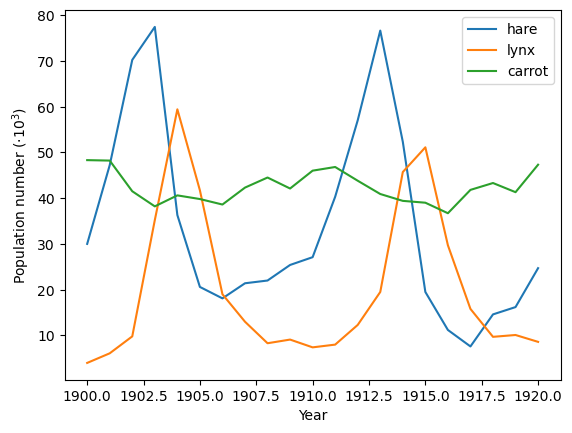

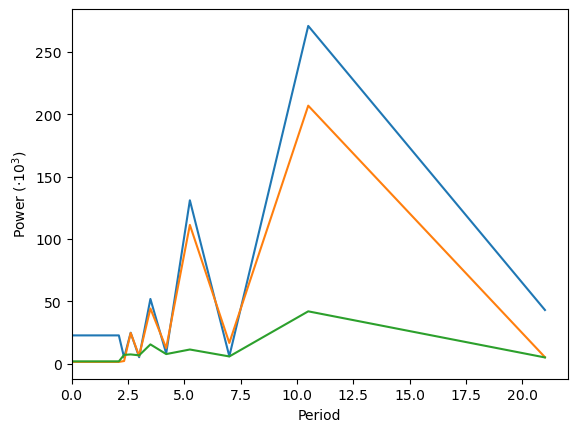

In [68]:
from scipy import fftpack
import pandas as pd

!cat data/populations.txt

data = np.loadtxt('data/populations.txt')
years = data[:, 0]
populations = data[:, 1:]

plt.figure()
plt.plot(years, populations * 1e-3)
plt.xlabel('Year')
plt.ylabel('Population number ($\cdot10^3$)')
plt.legend(['hare', 'lynx', 'carrot'],  loc=1)


ft_populations = fftpack.fft(populations, axis=0) # on the rows
frequencies = fftpack.fftfreq(populations.shape[0], years[1] - years[0])
power = np.abs(ft_populations)
periods = 1 / frequencies
print(periods)

plt.figure()
plt.plot(periods, power * 1e-3)
plt.xlim(0, 22)
plt.xlabel('Period')
plt.ylabel('Power ($\cdot10^3$)')
plt.show()

#Regarding the plot, we see a peak in the power spectrum corresponding to a period of  around 1 year.

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("images/moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

Text(0.5, 1.0, 'Image without noise')

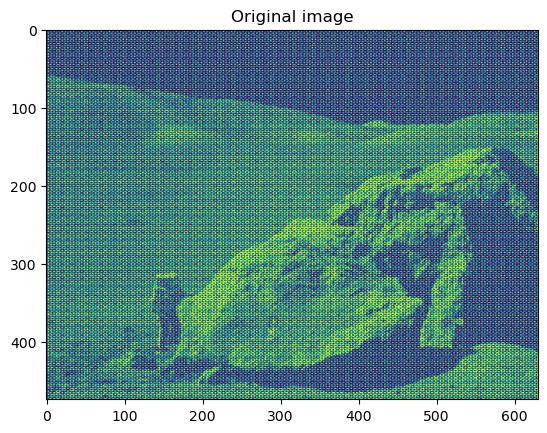

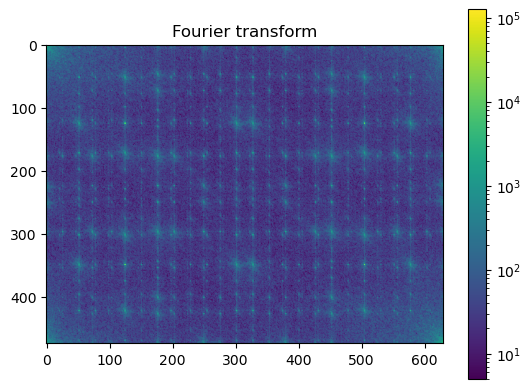

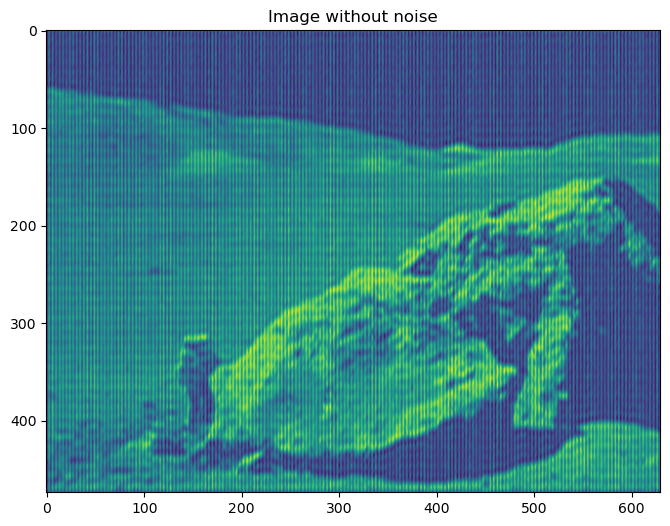

In [82]:
image = plt.imread("images/moonlanding.png")
plt.imshow(image)
plt.title('Original image')

# 2D FFT
image_fft = fftpack.fft2(image)

# Show the results
from matplotlib.colors import LogNorm
power_image = np.abs(image_fft)

plt.figure()
plt.imshow(power_image, norm=LogNorm(vmin=5))
plt.colorbar()
plt.title('Fourier transform')

# We can see that in each corner of the power spectrum, the light corresponds to the signal and the rest of the 
# fourier transform are periodic lights corresponding to the noise.
# We can say that each corner constitute 10% of the all image in each direction.

## Separation signal and noise

image_fft2 = image_fft.copy() # create an explicit copy of the FFT

r, c = image_fft2.shape # rows, columns

# Array slicing: Let's take 10% at the beiginning and the end of each direction of the fourier transform
# In another word, we set to 0 all regions between 10% and 90% fo the fourier transform

# For the rows:
image_fft2[int(r*0.1):int(0.9*r),:] = 0

# For the columns:
image_fft2[:,int(r*0.1):int(0.9*r)] = 0

# Inverse Fast Fourier Transform
filtered_image = fftpack.ifft2(image_fft2)

# only take the real part
real_filtered_image = np.real(filtered_image)

# plot the result of the IFFT
plt.figure(figsize=(8, 6))
plt.imshow(real_filtered_image)
#plt.plot(time_vec, image, alpha=0.5, label='Original signal')
#plt.plot(time_vec, real_filtered_signal, linewidth=3, label='Filtered signal')
plt.title('Image without noise')